# Data classification using Random Forest Classifier

In [1]:
from sklearn.model_selection import StratifiedKFold
import pybaobabdt
from sklearn import tree 


In [2]:
%run "../../common/matrix.py"
%run "../../common/function_classifier.py"
%run "../../common/Functions.py"
%run "../../common/file_handler.py"
%run "../../common/grid_search_rf.py"
%run "../../common/plot_functions.py"

In [3]:
FI_XSIZE = 20
FI_YSIZE = 10

FI_ALL_XSIZE = 30
FI_ALL_YSIZE = 15

PERF_XSIZE =10
PERF_YSIZE = 12

In [4]:
FIGSAVE = True

### Import matrix

In [5]:
imported_matrix = open_file_from_fullpath(ask_file_path(), 'r')
matrix_tobe_classified = pd.read_perseus(imported_matrix)

In [6]:
matrix_json = open_file_from_fullpath(ask_file_path(), 'r')

### If matrix has QC, please execute the following cell

In [7]:
matrix_tobe_cl_noqc = slice_submatrix(matrix_tobe_classified,get_value_from_json(matrix_json,'sample_slice'))
dictionary_cl_noqc, matrix_tobe_cl_noqc = rename_matrixheader_labels(matrix_tobe_cl_noqc, get_value_from_json(matrix_json,'sample_rename'))

#### Labels and features creation

In [8]:
binary_label_CO = create_labels(matrix_tobe_cl_noqc, drop= ['post', 'local'])
binary_features_CO = create_feature_matrix(matrix_tobe_cl_noqc, drop=['post', 'local'])

In [9]:
binary_label_CL = create_labels(matrix_tobe_cl_noqc, drop = ['post', 'onset'])
binary_features_CL = create_feature_matrix(matrix_tobe_cl_noqc, drop = ['post', 'onset'])

In [10]:
binary_label_LO = create_labels(matrix_tobe_cl_noqc, drop = ['control', 'post'])
binary_features_LO = create_feature_matrix(matrix_tobe_cl_noqc, drop=  ['control', 'post'])


In [11]:
binary_label_OvsCL = create_labels_binary(matrix_tobe_cl_noqc, 'onset' ,'control_local', ['onset'], ['control', 'local'], discard=['post'])
binary_features_OvsCL = create_feature_matrix(matrix_tobe_cl_noqc, drop= 'post')

In [12]:
binary_features = create_feature_matrix(matrix_tobe_cl_noqc)
binary_labels = create_labels_binary(matrix_tobe_cl_noqc, 'healthy', 'sick', ['control'], ['local', 'post', 'onset'])
multiclass_features = create_feature_matrix(matrix_tobe_cl_noqc)
multiclass_labels = create_labels(matrix_tobe_cl_noqc)
sick_features = create_feature_matrix(matrix_tobe_cl_noqc, drop='control')
sick_labels = create_labels(matrix_tobe_cl_noqc, drop='control')

### Global Params for gridsearchCV

In [13]:
params_grid = {'max_depth': [int(x) for x in np.arange(1,10, 2)], 'max_features': ['log2','sqrt'], 'random_state' : [0]}
params_grid_50 = {'max_depth': [int(x) for x in np.arange(1,10, 2)], 'max_features': ['log2','sqrt'], 'random_state' : [0], 'n_estimators' : [50]}
params_grid_75 = {'max_depth': [int(x) for x in np.arange(1,10, 2)], 'max_features': ['log2','sqrt'], 'random_state' : [0], 'n_estimators' : [75]}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [14]:
Xbin_train, Xbin_test, ybin_train, ybin_test = train_test_split(binary_features, binary_labels, test_size= 0.20, random_state=0, stratify= binary_labels)
Xmulti_train, Xmulti_test, ymulti_train, ymulti_test = train_test_split(multiclass_features, multiclass_labels, test_size=0.20, random_state=0, stratify= multiclass_labels)
Xsick_train, Xsick_test, ysick_train, ysick_test = train_test_split(sick_features, sick_labels, test_size=0.20, random_state=0, stratify= sick_labels)

### Gridsearch

In [16]:
binary_grid100 = grid_search_rf_classifier(features=Xbin_train, labels= ybin_train, parameters = params_grid, cv = skf, name= "", checkpoint_path=None, checkpoint= False)
binary_grid75 = grid_search_rf_classifier(features=Xbin_train, labels= ybin_train, parameters = params_grid_75, cv = skf, name= "", checkpoint_path=None, checkpoint= False)
binary_grid50 = grid_search_rf_classifier(features=Xbin_train, labels= ybin_train, parameters = params_grid_50, cv = skf, name= "", checkpoint_path=None, checkpoint= False)

multi_grid100 = grid_search_rf_classifier(features=Xmulti_train, labels= ymulti_train, parameters = params_grid, cv = skf, name= "", checkpoint_path=None, checkpoint= False)
multi_grid75 = grid_search_rf_classifier(features=Xmulti_train, labels= ymulti_train, parameters = params_grid_75, cv = skf, name= "", checkpoint_path=None, checkpoint= False)
multi_grid50 = grid_search_rf_classifier(features=Xmulti_train, labels= ymulti_train, parameters = params_grid_50, cv = skf, name= "", checkpoint_path=None, checkpoint= False)

sick_grid100 = grid_search_rf_classifier(features=Xsick_train, labels= ysick_train, parameters = params_grid, cv = skf, name= "", checkpoint_path=None, checkpoint= False)
sick_grid75 = grid_search_rf_classifier(features=Xsick_train, labels= ysick_train, parameters = params_grid_75, cv = skf, name= "", checkpoint_path=None, checkpoint= False)
sick_grid50 = grid_search_rf_classifier(features=Xsick_train, labels= ysick_train, parameters = params_grid_50, cv = skf, name= "", checkpoint_path=None, checkpoint= False)


Grid search completed!

Grid search completed!

Grid search completed!

Grid search completed!

Grid search completed!

Grid search completed!

Grid search completed!

Grid search completed!

Grid search completed!


### Classifiers

In [26]:
binary_classifier = RandomForestClassifier(criterion='gini', max_depth= binary_grid100[0].best_params_['max_depth'], max_features= binary_grid100[0].best_params_['max_features'])
binary_classifier.fit(Xbin_train, ybin_train)
binary_classifier75 = RandomForestClassifier(criterion='gini', max_depth= binary_grid75[0].best_params_['max_depth'], max_features= binary_grid75[0].best_params_['max_features'], n_estimators= 75)
binary_classifier75.fit(Xbin_train, ybin_train)
binary_classifier50 = RandomForestClassifier(criterion='gini', max_depth= binary_grid50[0].best_params_['max_depth'], max_features= binary_grid50[0].best_params_['max_features'], n_estimators= 50)
binary_classifier50.fit(Xbin_train, ybin_train)

RandomForestClassifier(max_depth=1, max_features='log2', n_estimators=50)

In [27]:
multi_classifier = RandomForestClassifier(criterion='gini', max_depth= multi_grid100[0].best_params_['max_depth'], max_features= multi_grid100[0].best_params_['max_features'])
multi_classifier.fit(Xmulti_train, ymulti_train)
multi_classifier_75 = RandomForestClassifier(criterion='gini', max_depth= multi_grid75[0].best_params_['max_depth'], max_features= multi_grid75[0].best_params_['max_features'], n_estimators=75)
multi_classifier_75.fit(Xmulti_train, ymulti_train)
multi_classifier50 = RandomForestClassifier(criterion='gini',max_depth= multi_grid50[0].best_params_['max_depth'], max_features= multi_grid50[0].best_params_['max_features'], n_estimators= 50)
multi_classifier50.fit(Xmulti_train, ymulti_train)

RandomForestClassifier(max_depth=3, max_features='sqrt', n_estimators=50)

In [28]:
sick_classifier = RandomForestClassifier(criterion='gini', max_depth= sick_grid100[0].best_params_['max_depth'], max_features= sick_grid100[0].best_params_['max_features'])
sick_classifier.fit(Xsick_train, ysick_train)
sick_classifier_75 = RandomForestClassifier(criterion='gini', max_depth= sick_grid75[0].best_params_['max_depth'], max_features= sick_grid75[0].best_params_['max_features'], n_estimators=75)
sick_classifier_75.fit(Xsick_train, ysick_train)
sick_classifier50 = RandomForestClassifier(criterion='gini', max_depth= sick_grid50[0].best_params_['max_depth'], max_features= sick_grid50[0].best_params_['max_features'], n_estimators= 50)
sick_classifier50.fit(Xsick_train, ysick_train)

RandomForestClassifier(max_depth=5, max_features='sqrt', n_estimators=50)

### Prediction and result printing

In [30]:
ybinary_prediction = binary_classifier.predict(Xbin_test)
ybinary_prediction75 = binary_classifier75.predict(Xbin_test)
ybinary_prediction50 = binary_classifier50.predict(Xbin_test)


ymulti_prediction = multi_classifier.predict(Xmulti_test)
ymulti_prediction75 = multi_classifier_75.predict(Xmulti_test)
ymulti_prediction50 = multi_classifier50.predict(Xmulti_test)


ysick_prediction = sick_classifier.predict(Xsick_test)
ysick_prediction75 = sick_classifier_75.predict(Xsick_test)
ysick_prediction50 = sick_classifier50.predict(Xsick_test)

PREDICTION

In [32]:
print('Binary classification results are: ')
print('\t')
print_results(ybin_test, ybinary_prediction)
print('\t')
print_results(ybin_test, ybinary_prediction75)
print('\t')
print_results(ybin_test, ybinary_prediction50)
print('\t')
print('Multi classification results:')
print_results(ymulti_test, ymulti_prediction)
print('\t')
print_results(ymulti_test, ymulti_prediction75)
print('\t')
print_results(ymulti_test, ymulti_prediction50)
print('\t')
print('Multi classification among sick categories:')
print_results(ysick_test, ysick_prediction)
print('\t')
print_results(ysick_test, ysick_prediction75)
print('\t')
print_results(ysick_test, ysick_prediction50)


Binary classification results are: 
	
Accuracy: 1.000
Balanced Accuracy: 1.000
f1 score: 1.000 
	
Accuracy: 1.000
Balanced Accuracy: 1.000
f1 score: 1.000 
	
Accuracy: 1.000
Balanced Accuracy: 1.000
f1 score: 1.000 
	
Multi classification results:
Accuracy: 1.000
Balanced Accuracy: 1.000
f1 score: 1.000 
	
Accuracy: 1.000
Balanced Accuracy: 1.000
f1 score: 1.000 
	
Accuracy: 0.950
Balanced Accuracy: 0.950
f1 score: 0.949 
	
Multi classification among sick categories:
Accuracy: 0.875
Balanced Accuracy: 0.878
f1 score: 0.879 
	
Accuracy: 0.938
Balanced Accuracy: 0.944
f1 score: 0.937 
	
Accuracy: 0.938
Balanced Accuracy: 0.944
f1 score: 0.937 


### Creation of the dataframe that contains the accuracy score for each classifier

OTHER CASE

In [39]:
binary_df = create_dataframe(['X', 'Y'], [[binary_classifier.n_estimators, binary_classifier75.n_estimators, binary_classifier50.n_estimators], 
[balanced_accuracy_score(ybin_test, ybinary_prediction), balanced_accuracy_score(ybin_test, ybinary_prediction75) ,balanced_accuracy_score(ybin_test, ybinary_prediction50)]])


multi_df = create_dataframe(['X', 'Y'], [[multi_classifier.n_estimators,multi_classifier_75.n_estimators, binary_classifier50.n_estimators],
[balanced_accuracy_score(ymulti_test, ymulti_prediction),balanced_accuracy_score(ymulti_test, ymulti_prediction75), balanced_accuracy_score(ymulti_test, ymulti_prediction50)]])

sick_df = create_dataframe(['X', 'Y'], [[sick_classifier.n_estimators, sick_classifier_75.n_estimators, sick_classifier50.n_estimators],
[balanced_accuracy_score(ysick_test, ysick_prediction), balanced_accuracy_score(ysick_test, ysick_prediction75), balanced_accuracy_score(ysick_test, ysick_prediction50)]])


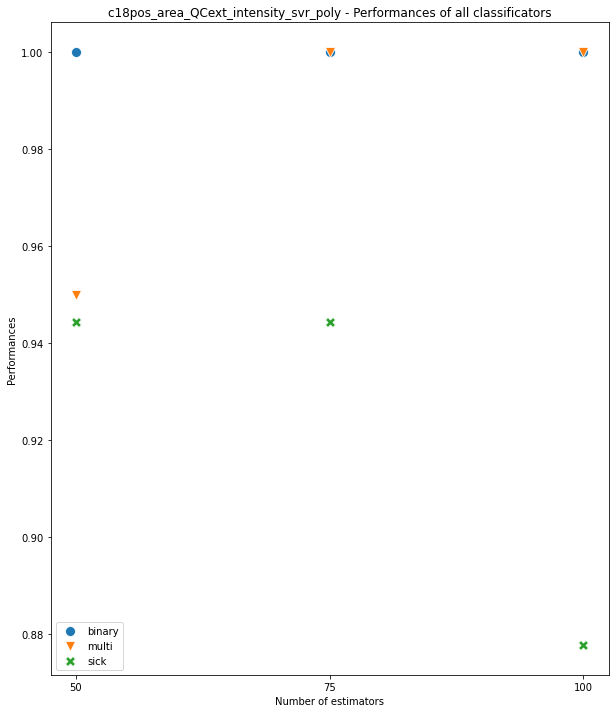

In [40]:
performances = display_performances_wl([binary_df, multi_df, sick_df], [50,75,100],get_file_name(imported_matrix) + ' - Performances of all classificators', 'Number of estimators', 'Performances', PERF_XSIZE, PERF_YSIZE, ['o', 'v', 'X'], 100, ['binary', 'multi', 'sick'], FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_RF_Performances_all_classificators','.svg'))

### Confusion matrix

In [58]:
cm_binary = confusion_matrix(ybin_test, ybinary_prediction, normalize= 'pred')
cm_binary75 = confusion_matrix(ybin_test, ybinary_prediction75, normalize= 'pred')
cm_binary50 = confusion_matrix(ybin_test, ybinary_prediction50, normalize= 'pred')


cm_multi= confusion_matrix(ymulti_test, ymulti_prediction,normalize= 'pred')
cm_multi75= confusion_matrix(ymulti_test, ymulti_prediction75,normalize= 'pred')
cm_multi50 = confusion_matrix(ymulti_test, ymulti_prediction50, normalize= 'pred')

cm_sick = confusion_matrix(ysick_test, ysick_prediction, normalize= 'pred')
cm_sick75 = confusion_matrix(ysick_test, ysick_prediction75, normalize= 'pred')
cm_sick50 = confusion_matrix(ysick_test, ysick_prediction50, normalize= 'pred')

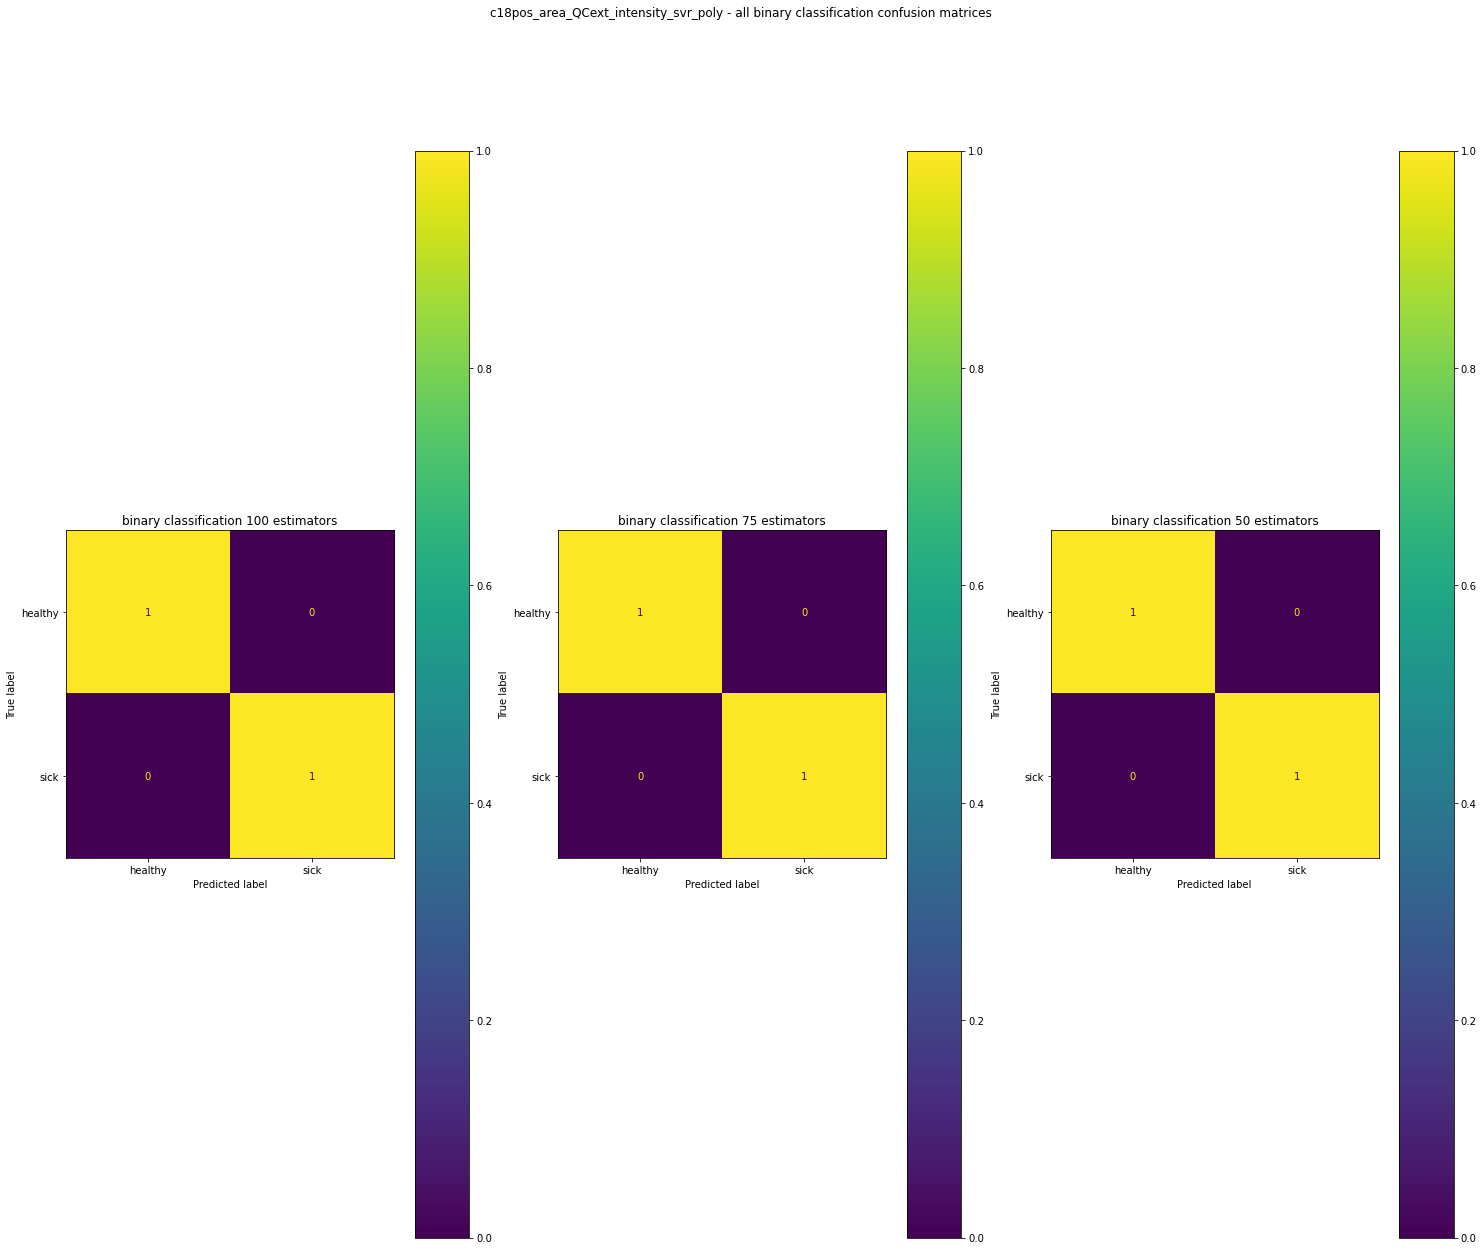

In [59]:
display_confusion_matrices_binary = function_subplots_confusionmatrix([cm_binary, cm_binary75, cm_binary50], 1, 3, ['binary classification 100 estimators', 'binary classification 75 estimators','binary classification 50 estimators',],get_file_name(imported_matrix) + ' - all binary classification confusion matrices', 25 , 20, labels=[binary_classifier.classes_, binary_classifier75.classes_,binary_classifier50.classes_], fig_save=FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_RF_confusion_matrix_binary','.svg') )

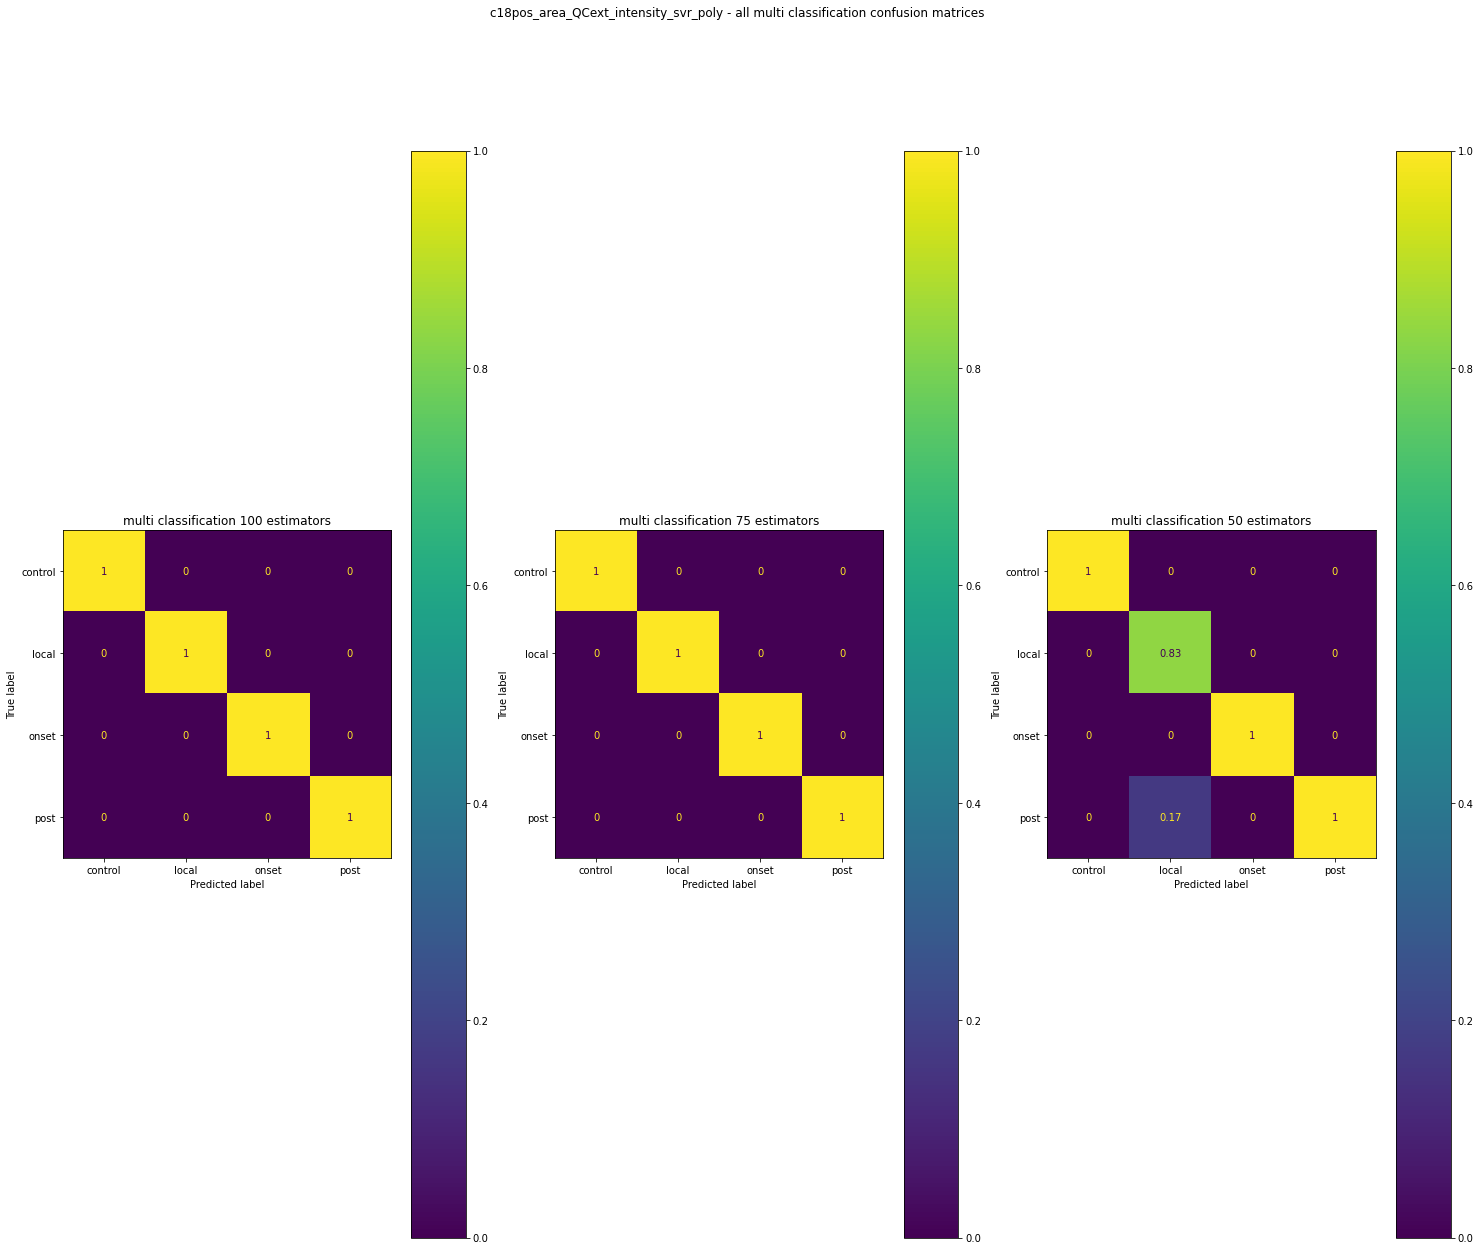

In [60]:
display_confusion_matrices_multi = function_subplots_confusionmatrix([ cm_multi, cm_multi75,cm_multi50], 1, 3, ['multi classification 100 estimators', 'multi classification 75 estimators', 'multi classification 50 estimators'], get_file_name(imported_matrix) + ' - all multi classification confusion matrices', 25 , 20, labels=[ multi_classifier.classes_, multi_classifier_75.classes_,multi_classifier50.classes_], fig_save=FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_RF_confusion_matrix_multiclass','.svg'))

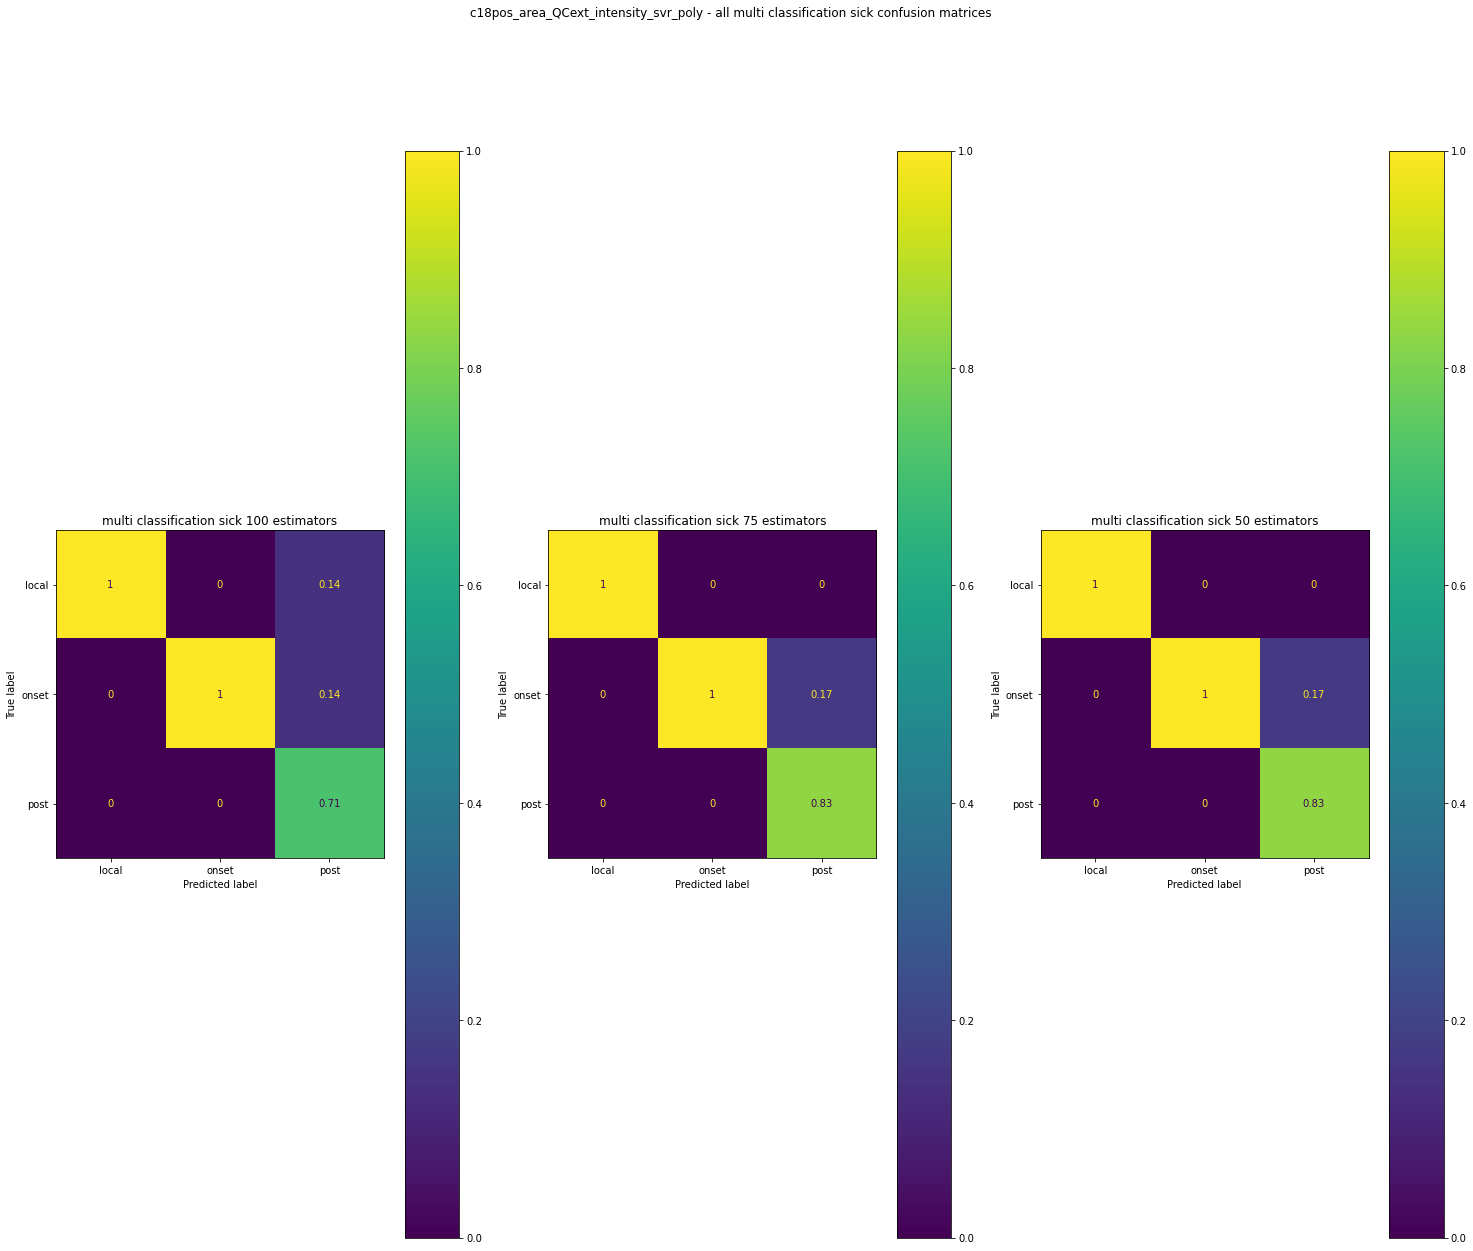

In [61]:
display_confusion_matrices_sick = function_subplots_confusionmatrix([ cm_sick,cm_sick75 ,cm_sick50], 1, 3, ['multi classification sick 100 estimators','multi classification sick 75 estimators' ,'multi classification sick 50 estimators'], get_file_name(imported_matrix) + ' - all multi classification sick confusion matrices', 25 , 20, labels=[ sick_classifier.classes_, sick_classifier_75.classes_ ,sick_classifier50.classes_], fig_save=FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_RF_confusion_matrix_multiclass_sick','.svg'))

#### From each classifier we create a dictionary containing feature_importances

In [62]:
matrix_for_dict = multi_to_single_header(matrix_tobe_classified, get_value_from_json(matrix_json,'header_num_dict'))

In [63]:
feat_imp_binary = relevant_feature_importances(binary_classifier)
dic_fi_binary = create_dict_feature_importances(matrix_for_dict, feat_imp_binary, get_value_from_json(matrix_json, 'dic_column_name'))
dic_fi_binary_filtered = filter_feature_importances_by_threshold(dic_fi_binary, get_value_from_json(matrix_json, 'threshold'))
dic_fi_num_binary = from_dic_FI_todict_number(dic_fi_binary, get_value_from_json(matrix_json, 'threshold'))
filter_binary_fi = filter_feature_importances(dic_fi_num_binary)

feat_imp_binary75 = relevant_feature_importances(binary_classifier75)
dic_fi_binary75 = create_dict_feature_importances(matrix_for_dict, feat_imp_binary75, get_value_from_json(matrix_json, 'dic_column_name'))
dic_fi_binary75_filtered = filter_feature_importances_by_threshold(dic_fi_binary75, get_value_from_json(matrix_json, 'threshold'))
dic_fi_num_binary75 = from_dic_FI_todict_number(dic_fi_binary75, get_value_from_json(matrix_json, 'threshold'))
filter_binary75_fi = filter_feature_importances(dic_fi_num_binary75)

feat_imp_binary50 = relevant_feature_importances(binary_classifier50)
dic_fi_binary50 = create_dict_feature_importances(matrix_for_dict, feat_imp_binary50, get_value_from_json(matrix_json, 'dic_column_name'))
dic_fi_binary50_filtered = filter_feature_importances_by_threshold(dic_fi_binary50, get_value_from_json(matrix_json, 'threshold'))
dic_fi_num_binary50 = from_dic_FI_todict_number(dic_fi_binary50, get_value_from_json(matrix_json, 'threshold'))
filter_binary50_fi = filter_feature_importances(dic_fi_num_binary50)

feat_imp_multi = relevant_feature_importances(multi_classifier)
dic_fi_multi = create_dict_feature_importances(matrix_for_dict, feat_imp_multi, get_value_from_json(matrix_json, 'dic_column_name'))
dic_fi_multi_filtered = filter_feature_importances_by_threshold(dic_fi_multi, get_value_from_json(matrix_json, 'threshold'))
dic_fi_num_multi = from_dic_FI_todict_number(dic_fi_multi, get_value_from_json(matrix_json, 'threshold'))
filter_multi_fi = filter_feature_importances(dic_fi_num_multi)

feat_imp_multi75 = relevant_feature_importances(multi_classifier_75)
dic_fi_multi75 = create_dict_feature_importances(matrix_for_dict, feat_imp_multi75, get_value_from_json(matrix_json, 'dic_column_name'))
dic_fi_multi75_filtered = filter_feature_importances_by_threshold(dic_fi_multi75, get_value_from_json(matrix_json, 'threshold'))
dic_fi_num_multi75 = from_dic_FI_todict_number(dic_fi_multi75, get_value_from_json(matrix_json, 'threshold'))
filter_multi75_fi = filter_feature_importances(dic_fi_num_multi75)

feat_imp_multi50 = relevant_feature_importances(multi_classifier50)
dic_fi_multi50 = create_dict_feature_importances(matrix_for_dict, feat_imp_multi50, get_value_from_json(matrix_json, 'dic_column_name'))
dic_fi_multi50_filtered = filter_feature_importances_by_threshold(dic_fi_multi50, get_value_from_json(matrix_json, 'threshold'))
dic_fi_num_multi50 = from_dic_FI_todict_number(dic_fi_multi50, get_value_from_json(matrix_json, 'threshold'))
filter_multi50_fi = filter_feature_importances(dic_fi_num_multi50)

feat_impo_sick = relevant_feature_importances(sick_classifier)
dic_fi_sick = create_dict_feature_importances(matrix_for_dict, feat_impo_sick, get_value_from_json(matrix_json,'dic_column_name'))
dic_fi_sick_filtered = filter_feature_importances_by_threshold(dic_fi_sick, get_value_from_json(matrix_json,'threshold'))
dic_fi_number_sick = from_dic_FI_todict_number(dic_fi_sick, get_value_from_json(matrix_json, 'threshold'))
filter_sick_fi = filter_feature_importances(dic_fi_number_sick)

feat_impo_sick75 = relevant_feature_importances(sick_classifier_75)
dic_fi_sick75 = create_dict_feature_importances(matrix_for_dict, feat_impo_sick75, get_value_from_json(matrix_json,'dic_column_name'))
dic_fi_sick75_filtered = filter_feature_importances_by_threshold(dic_fi_sick75, get_value_from_json(matrix_json,'threshold'))
dic_fi_number_sick75 = from_dic_FI_todict_number(dic_fi_sick75, get_value_from_json(matrix_json, 'threshold'))
filter_sick75_fi = filter_feature_importances(dic_fi_number_sick75)

feat_impo_sick50 = relevant_feature_importances(sick_classifier50)
dic_fi_sick50 = create_dict_feature_importances(matrix_for_dict, feat_impo_sick50, get_value_from_json(matrix_json, 'dic_column_name'))
dic_fi_sick50_filtered = filter_feature_importances_by_threshold(dic_fi_sick50, get_value_from_json(matrix_json, 'threshold'))
dic_fi_number_sick50 = from_dic_FI_todict_number(dic_fi_sick50, get_value_from_json(matrix_json, 'threshold'))
filter_sick50_fi = filter_feature_importances(dic_fi_number_sick50)

Find name features in matrix

Plot features importances

In [65]:
x_label = 'Metabolite ID'
y_label = 'Feature Importance'

In [ ]:

df_fi_binary_filtered = create_dataframe([x_label, y_label], [dic_fi_binary_filtered.keys(), dic_fi_binary_filtered.values()])
plot_features_importances(get_file_name(imported_matrix) + " - Binary classification - 100 estimators", df_fi_binary_filtered, 'Metabolite ID', y_label, FI_XSIZE, FI_YSIZE,  fig_save=FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_RF_plot_features_impo_binary_100','.svg'))

df_fi_binary75_filtered = create_dataframe([x_label, y_label], [dic_fi_binary75_filtered.keys(), dic_fi_binary75_filtered.values()])
plot_features_importances(get_file_name(imported_matrix) + " - Binary classification - 75 estimators", df_fi_binary75_filtered, 'Metabolite ID', y_label, FI_XSIZE, FI_YSIZE,  fig_save=FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_RF_plot_features_impo_binary_75','.svg'))

df_fi_binary50_filtered = create_dataframe([x_label, y_label], [dic_fi_binary50_filtered.keys(), dic_fi_binary50_filtered.values()])
plot_features_importances(get_file_name(imported_matrix) + " - Binary classification - 50 estimators", df_fi_binary50_filtered, 'Metabolite ID', y_label, FI_XSIZE, FI_YSIZE, fig_save=FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_RF_plot_features_impo_binary_50','.svg'))



df_fi_multi_filtered = create_dataframe([x_label, y_label], [dic_fi_multi_filtered.keys(), dic_fi_multi_filtered.values()])
plot_features_importances(get_file_name(imported_matrix) + " - Multiclass classification - 100 estimators ", df_fi_multi_filtered, 'Metabolite ID', y_label, FI_XSIZE, FI_YSIZE, fig_save=FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_RF_plot_features_impo_multiclass_100','.svg'))

df_fi_multi75_filtered = create_dataframe([x_label, y_label], [dic_fi_multi75_filtered.keys(), dic_fi_multi75_filtered.values()])
plot_features_importances(get_file_name(imported_matrix) + " - Multiclass classification -  75 estimators ", df_fi_multi75_filtered, 'Metabolite ID', y_label, FI_XSIZE, FI_YSIZE, fig_save=FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_RF_plot_features_impo_multiclass_75','.svg'))

df_fi_multi50_filtered = create_dataframe([x_label, y_label], [dic_fi_multi50_filtered.keys(), dic_fi_multi50_filtered.values()])
plot_features_importances(get_file_name(imported_matrix) + " - Multiclass classification - 50 estimators", df_fi_multi50_filtered, 'Metabolite ID', y_label, FI_XSIZE, FI_YSIZE, fig_save=FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_RF_plot_features_impo_multiclass_50','.svg'))


df_fi_sick_filtered = create_dataframe([x_label, y_label], [dic_fi_sick_filtered.keys(), dic_fi_sick_filtered.values()])
plot_features_importances(get_file_name(imported_matrix) + " - Classification among sick categories - 100 estimators", df_fi_sick_filtered, 'Metabolite ID', y_label, FI_XSIZE, FI_YSIZE, fig_save=FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_RF_plot_features_impo_multiclass_sick_100','.svg'))

df_fi_sick75_filtered = create_dataframe([x_label, y_label], [dic_fi_sick75_filtered.keys(), dic_fi_sick75_filtered.values()])
plot_features_importances(get_file_name(imported_matrix) + " - Classification among sick categories - 75 estimators", df_fi_sick75_filtered, 'Metabolite ID', y_label, FI_XSIZE, FI_YSIZE, fig_save=FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_RF_plot_features_impo_multiclass_sick_75','.svg'))

df_fi_sick50_filtered = create_dataframe([x_label, y_label], [dic_fi_sick50_filtered.keys(), dic_fi_sick50_filtered.values()])
plot_features_importances(get_file_name(imported_matrix) + " - Classification among sick categories - 50 estimators", df_fi_sick50_filtered, 'Metabolite ID', y_label, FI_XSIZE, FI_YSIZE, fig_save=FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_RF_plot_features_impo_multiclass_sick_50','.svg'))

RANDOM FOREST PLOT SINGLE ESTIMATORS

In [ ]:
plot_rf_trees(get_file_name(imported_matrix)+ ' - binary classification, 100 estimators', binary_classifier.estimators_, 10, 10, 50,50, binary_classifier.classes_, fig_save=FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_RF_Decision_tree_binary_100_estimators','.svg'))

In [ ]:
plot_rf_trees(get_file_name(imported_matrix)+ ' - binary classification, 50 estimators',binary_classifier50.estimators_, 5, 10, 50, 50, binary_classifier50.classes_, fig_save=FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_RF_Decision_tree_binary_50_estimators','.svg'))

In [ ]:
plot_rf_trees(get_file_name(imported_matrix)+ ' - multi classification, 100 estimators',multi_classifier.estimators_, 10, 10, 50,50, multi_classifier.classes_, fig_save=FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_RF_Decision_tree_multiclass_100_estimators','.svg'))

In [ ]:
plot_rf_trees(get_file_name(imported_matrix)+ ' - multi classification, 50 estimators',multi_classifier50.estimators_, 5, 10, 50,50, multi_classifier50.classes_, fig_save=FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_RF_Decision_tree_multiclass_50_estimators','.svg'))

In [ ]:
plot_rf_trees(get_file_name(imported_matrix)+ ' - multi classification among sick categories, 100 estimators',sick_classifier.estimators_, 10, 10, 50,50, sick_classifier.classes_, fig_save=FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_RF_Decision_tree_multi_sick_100_estimators','.svg'))

In [ ]:
plot_rf_trees(get_file_name(imported_matrix)+ ' - multi classification among sick categories, 50 estimators',sick_classifier50.estimators_, 5, 10, 100,100, sick_classifier50.classes_, fig_save=FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_RF_Decision_tree_multi_sick_50_estimators','.svg'))

### From gridsearch results we create a dataframe and after we view those data

In [ ]:
list_param_cv_resul = ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'param_max_depth', 'param_max_features', 'rank_test_score']

In [ ]:

df_binarygrid = create_dataframe_fromgrid_result(binary_grid100[0], list_param_cv_resul)
df_binarygrid75 = create_dataframe_fromgrid_result(binary_grid75[0], list_param_cv_resul)
df_binarygrid50 = create_dataframe_fromgrid_result(binary_grid50[0], list_param_cv_resul)

df_multigrid = create_dataframe_fromgrid_result(multi_grid100[0], list_param_cv_resul)
df_multigrid75 = create_dataframe_fromgrid_result(multi_grid75[0], list_param_cv_resul)
df_multigrid50 = create_dataframe_fromgrid_result(multi_grid50[0], list_param_cv_resul)

df_sickgrid = create_dataframe_fromgrid_result(sick_grid100[0], list_param_cv_resul)
df_sickgrid75 = create_dataframe_fromgrid_result(sick_grid75[0], list_param_cv_resul)
df_sickgrid50 = create_dataframe_fromgrid_result(sick_grid50[0], list_param_cv_resul)

Report test score 

In [ ]:
view_test_score_result_bin = function_subplots_testscore_gridsearch(df_binarygrid, ['sqrt', 'log2'], ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score'], [get_file_name(imported_matrix) + ' - Binary classification 100 estimators: test scores results considering max_features= sqrt', get_file_name(imported_matrix) + ' - Binary classification 100 estimators: test scores results considering max_features= log2'], FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_RF_Test_score_binary100','.svg'))
view_test_score_result_bin75 = function_subplots_testscore_gridsearch(df_binarygrid75, ['sqrt', 'log2'], ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score'], [get_file_name(imported_matrix) + ' - Binary classification 75 estimators: test scores results considering max_features= sqrt', get_file_name(imported_matrix) + ' - Binary classification 75 estimators: test scores results considering max_features= log2'], FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_RF_Test_score_binary75','.svg'))
view_test_score_result_bin50 = function_subplots_testscore_gridsearch(df_binarygrid50, ['sqrt', 'log2'], ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score'], [get_file_name(imported_matrix) + ' - Binary classification 50 estimators: test scores results considering max_features= sqrt', get_file_name(imported_matrix) + ' - Binary classification 50 estimators: test scores results considering max_features= log2'], FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_RF_Test_score_binary50','.svg'))


view_test_score_result_multi = function_subplots_testscore_gridsearch(df_multigrid, ['sqrt', 'log2'], ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score'], [get_file_name(imported_matrix) + ' - Multi classification 100 estimators: test scores results considering max_features= sqrt', get_file_name(imported_matrix) + ' - Multi classification 100 estimators: test scores results considering max_features= log2'], FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_RF_Test_score_multi100','.svg'))
view_test_score_result_multi75 = function_subplots_testscore_gridsearch(df_multigrid75, ['sqrt', 'log2'], ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score'], [get_file_name(imported_matrix) + ' - Multi classification 75 estimators: test scores results considering max_features= sqrt', get_file_name(imported_matrix) + ' - Multi classification 75 estimators: test scores results considering max_features= log2'], FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_RF_Test_score_multi75','.svg'))
view_test_score_result_multi50 = function_subplots_testscore_gridsearch(df_multigrid50, ['sqrt', 'log2'], ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score'], [get_file_name(imported_matrix) + ' - Multi classification 50 estimators: test scores results considering max_features= sqrt', get_file_name(imported_matrix) + ' - Multi classification 50 estimators: test scores results considering max_features= log2'], FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_RF_Test_score_multi50','.svg'))


view_test_score_result_sick = function_subplots_testscore_gridsearch(df_sickgrid, ['sqrt', 'log2'], ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score'],  [get_file_name(imported_matrix) + ' - Multi classification among sick categories 100 estimators: test scores results considering max_features= sqrt', get_file_name(imported_matrix) + ' - Multi classification among sick categories 100 estimators: test scores results considering max_features= log2'], FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_RF_Test_score_multisick100','.svg'))
view_test_score_result_sick75 = function_subplots_testscore_gridsearch(df_sickgrid75, ['sqrt', 'log2'], ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score'],  [get_file_name(imported_matrix) + ' - Multi classification among sick categories 75 estimators: test scores results considering max_features= sqrt', get_file_name(imported_matrix) + ' - Multi classification among sick categories 75 estimators: test scores results considering max_features= log2'], FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_RF_Test_score_multisick75','.svg'))
view_test_score_result_sick50 = function_subplots_testscore_gridsearch(df_sickgrid50, ['sqrt', 'log2'], ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score'], [get_file_name(imported_matrix) + ' - Multi classification among sick categories 50 estimators: test scores results considering max_features= sqrt', get_file_name(imported_matrix) + ' - Multi classification among sick categories 50 estimators: test scores results considering max_features= log2'], FIGSAVE, fig_path= merge_path_filename(get_file_path(imported_matrix), get_file_name(imported_matrix), '_RF_Test_score_multisick50','.svg'))

In [ ]:
imported_matrix.close()
matrix_json.close()